In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"

df = pd.read_csv(url)
df = df.drop(columns=["CustomerID"])


print(df.head())
print(df.describe())
df.info()


    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (to

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


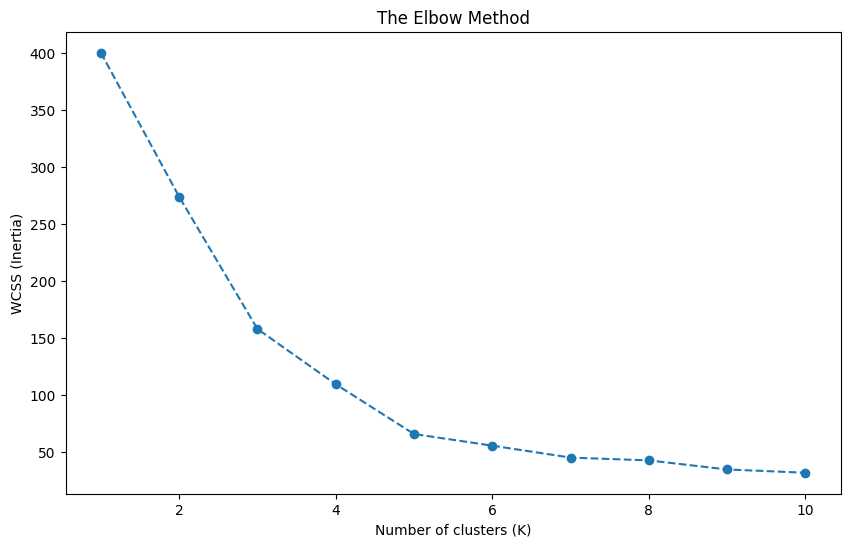

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++", random_state=1)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.show()


Text(0, 0.5, 'Silhouette Score')

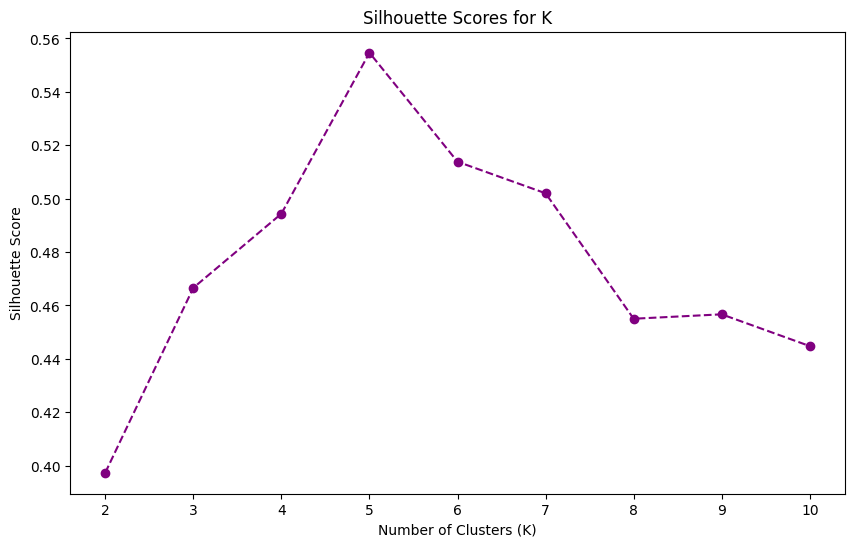

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_score.append(sil)


plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_score, marker='o', linestyle='--', color='purple')
plt.title("Silhouette Scores for K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")



**Elbow Method Interpretation**

The WCSS curve decreases sharply from K = 1 to K = 4, and then the rate of decrease slows down significantly after K = 5. This “elbow” at K = 5 indicates that adding more clusters beyond 5 gives only small improvements.

**Silhouette Score Interpretation**

The silhouette score increases from K = 2 to K = 5, reaching its maximum value at K = 5.
After K = 5, the silhouette score drops, meaning the clusters become less well-defined when more clusters are added.

**Conclusion**

Both methods indicate that K = 5 is the most reasonable choice.

This suggests that the customer base naturally forms five distinct segments.

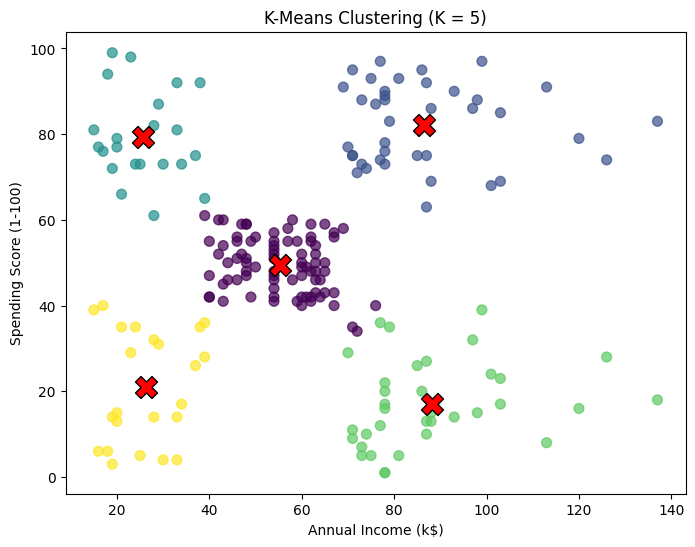

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans( n_clusters=5, init="k-means++", n_init=10, max_iter=300, random_state=42)

kmeans.fit(X_scaled)

labels = kmeans.labels_
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

df["Cluster"] = labels
df.head()

plt.figure(figsize=(8,6))
plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"],
    cmap="viridis",
    s=50,
    alpha=0.7
)

# Plot centroids
plt.scatter(
    centers_original[:, 0],
    centers_original[:, 1],
    c="red",
    s=250,
    marker="X",
    edgecolors="black"
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering (K = 5)")
plt.show()



In [ ]:
cluster_summary = df.groupby("Cluster").agg({
    "Age": "mean",
    "Annual Income (k$)": "mean",
    "Spending Score (1-100)": "mean",
    "Cluster": "count"
}).rename(columns={"Cluster": "Size"})

cluster_summary


,Age,Annual Income (k$),Spending Score (1-100),Size
Cluster,,,,
0,42.716049,55.296296,49.518519,81
1,32.692308,86.538462,82.128205,39
2,25.272727,25.727273,79.363636,22
3,41.114286,88.200000,17.114286,35
4,45.217391,26.304348,20.913043,23


# **Cluster 0** - Largest group

Profile:

- Age: ~43

- Income: mid-range (~55k)

- Spending Score: average

- Size: 81 customers

**Interpretation:**
These are middle-aged, middle-income customers with balanced spending behavior.

**Strategy:**

- Promote loyalty programs and membership benefits

- Offer moderate-priced products

- Offer seasonal deals

# **Cluster 1** “High income, high spenders”

Profile:

- Age: ~33 (younger adults)

- High income (~86k)

- Very high spending

- Size: 39 customers

**Interpretation:**
This is the premium segment; younger people with strong purchasing power who spend a lot.

**Strategy:**

- Offer premium products

- Personalised shopping assistants

- VIP loyalty tiers )

# **Cluster 2** “Low income, high spenders”

Profile:

- Age: ~25 (youngest group)

- Low income (~25k)

- High spending

- Size: 22 customers

**Interpretation:**

These are often students or young adults who spend disproportionately high relative to their income.

**Strategy:**

- Focus on fast fashion, cosmetics, entertainment

- Social media–driven marketing (Instagram/TikTok ads)

- Student discounts or bundles

# **Cluster 3** “High income, low spenders”

Profile:

- Age: ~41

- High income (~88k)

- Very low spending (~17)

- Size: 35 customers

**Interpretation:**

These customers have money but don’t spend much - maybe price-sensitive or not engaged with the mall.

**Strategy:**

- Highlight quality and long-term value

- Promotions on higher-end goods they might be willing to try

# **Cluster 4** “Low income, low spenders”

Profile:

- Age: ~45

- Low income (~26k)

- Low spending (~21)

- Size: 23 customers

**Interpretation:**

These customers are the least profitable segment.

**Strategy:**

- Focus on discounts, basic essentials, value brands

- Promote low-cost shopping days


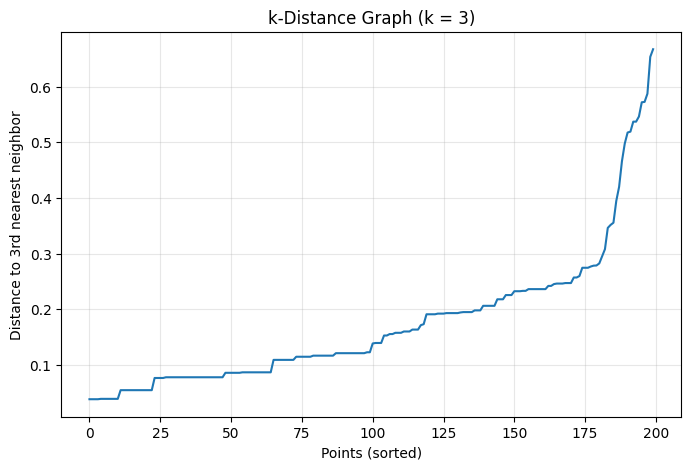

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

min_samples = 3 # MinPts = 2 x dimensions - 1 where dimensions = 2

nbrs = NearestNeighbors(n_neighbors=min_samples)
nbrs.fit(X_scaled)

distances, indices = nbrs.kneighbors(X_scaled)

k_distances = distances[:, -1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8, 5))
plt.plot(k_distances_sorted)
plt.xlabel("Points (sorted)")
plt.ylabel("Distance to 3rd nearest neighbor")
plt.title("k-Distance Graph (k = 3)")
plt.grid(alpha=0.3)
plt.show()



=== eps = 0.25 ===
Labels and counts: [(np.int64(-1), np.int64(16)), (np.int64(0), np.int64(12)), (np.int64(1), np.int64(6)), (np.int64(2), np.int64(7)), (np.int64(3), np.int64(3)), (np.int64(4), np.int64(3)), (np.int64(5), np.int64(5)), (np.int64(6), np.int64(3)), (np.int64(7), np.int64(87)), (np.int64(8), np.int64(28)), (np.int64(9), np.int64(14)), (np.int64(10), np.int64(12)), (np.int64(11), np.int64(4))]


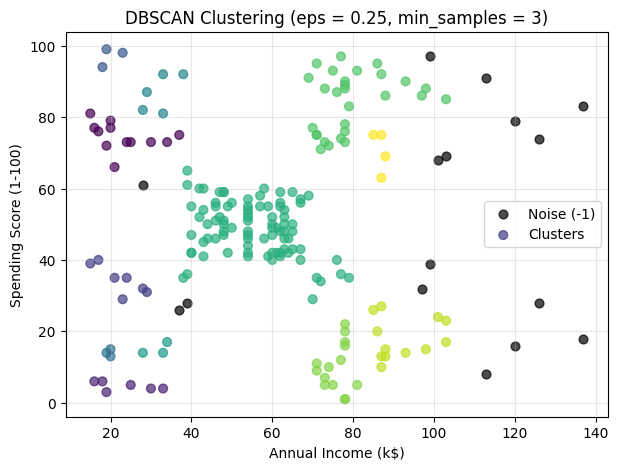


=== eps = 0.3 ===
Labels and counts: [(np.int64(-1), np.int64(14)), (np.int64(0), np.int64(7)), (np.int64(1), np.int64(17)), (np.int64(2), np.int64(9)), (np.int64(3), np.int64(3)), (np.int64(4), np.int64(3)), (np.int64(5), np.int64(89)), (np.int64(6), np.int64(32)), (np.int64(7), np.int64(14)), (np.int64(8), np.int64(12))]


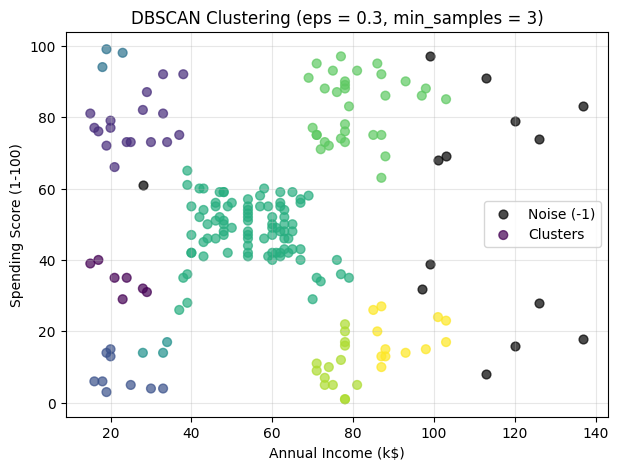

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

eps_values = [0.25, 0.3]
min_samples = 3                   # from the rule of thumb

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels_db = dbscan.fit_predict(X_scaled)

    unique_labels, counts = np.unique(labels_db, return_counts=True)
    print(f"\n=== eps = {eps} ===")
    print("Labels and counts:", list(zip(unique_labels, counts)))

    plt.figure(figsize=(7, 5))

    # Noise mask
    mask_noise = labels_db == -1
    # Core clusters mask
    mask_core = labels_db != -1

    # Plot noise (black)
    plt.scatter(
        df.loc[mask_noise, "Annual Income (k$)"],
        df.loc[mask_noise, "Spending Score (1-100)"],
        c="black",
        s=40,
        alpha=0.7,
        label="Noise (-1)"
    )

    # Plot clusters
    plt.scatter(
        df.loc[mask_core, "Annual Income (k$)"],
        df.loc[mask_core, "Spending Score (1-100)"],
        c=labels_db[mask_core],
        cmap="viridis",
        s=40,
        alpha=0.7,
        label="Clusters"
    )

    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)")
    plt.title(f"DBSCAN Clustering (eps = {eps}, min_samples = {min_samples})")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


In [ ]:
# Final DBSCAN choice  (eps = 0.30)
eps = 0.30
min_samples = 3

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_db = dbscan.fit_predict(X_scaled)

df["DBSCAN_Cluster"] = labels_db

dbscan_summary = df.groupby("DBSCAN_Cluster").agg({
    "Age": "mean",
    "Annual Income (k$)": "mean",
    "Spending Score (1-100)": "mean",
    "DBSCAN_Cluster": "count"
}).rename(columns={"DBSCAN_Cluster": "Size"})

dbscan_summary


,Age,Annual Income (k$),Spending Score (1-100),Size
DBSCAN_Cluster,,,,
-1,35.357143,108.500000,54.500000,14
0,36.714286,22.428571,34.428571,7
1,23.764706,25.823529,78.176471,17
2,48.888889,22.222222,7.777778,9
3,31.000000,20.000000,97.000000,3
4,48.333333,31.666667,15.000000,3
5,42.797753,55.022472,48.325843,89
6,32.812500,80.500000,82.562500,32
7,37.785714,75.928571,10.071429,14


# **Comparison of DBSCAN Clusters with K-Means Clusters**

**K-Means produces 5 clear, interpretable customer segments**

These clusters form well-separated and intuitive groups that are easy to use for marketing and customer targeting.

**DBSCAN produces many small density-based clusters**

DBSCAN identifies:

- One large cluster (Cluster 5, 89 customers) with moderate income and moderate spending

- A high-income, high-spending cluster (Cluster 6)

- A high-income, low-spending cluster (Cluster 7)

- A low-income, high-spending cluster (Cluster 1)

However, DBSCAN also creates several very small clusters, often with only 3 to 12 customers (Clusters 0, 2, 3, 4, 8). These clusters are based purely on local density rather than meaningful customer behavior patterns. As a result, they are not useful for marketing segmentation.

**Conclusion:**
DBSCAN clusters are less interpretable and less actionable than K-Means clusters.

# **Identifying Outliers (Noise Label = -1)**

DBSCAN flagged 14 customers as noise. These customers have the following characteristics:

- Very high income, averaging around 108k (the highest in the dataset)

- Medium spending scores, averaging around 54

- No nearby dense region of similar customers

**Interpretation:**
These customers appear to be VIPs with unusual purchasing behavior. They earn significantly more than typical customers but do not spend proportionally more. DBSCAN treats them as outliers because they are isolated from other customers in the feature space.

These individuals may be valuable to examine separately for premium service or high-value retention strategies.

# **K-Means vs DBSCAN: Which is Better for This Task?**
# **Which is easier to tune?**

- **K-Means**

- Requires selecting only one parameter, K.

- Methods such as the Elbow Method and Silhouette Score make this selection straightforward.

-  **DBSCAN**

- Requires tuning two parameters: eps and min_samples.

- Small changes in eps (for example, 0.25 to 0.30) can produce large differences in the number of clusters and the amount of noise.

- More sensitive and harder to tune consistently.

# **Which gives more interpretable segments?**

**K-Means**

- Produces balanced cluster sizes.

- Forms clean, spherical clusters that correspond well to real customer behavior categories.

**DBSCAN**

- Produces many small clusters.

- Includes one large, diffuse cluster and numerous tiny clusters with only a few points.

- Labels many customers as noise.


# **Which method would you use for this segmentation task and why?**

I would choose K-Means for this customer segmentation task. It produces stable, interpretable clusters that align with income and spending behavior, which are directly relevant for marketing strategies. The resulting segments are meaningful and easy to target.

DBSCAN, while useful for detecting outliers and irregular density patterns, produces too many small and fragmented clusters on this dataset. Its results are harder to interpret and less useful for creating actionable marketing groups.